In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [27]:
%%R

# Read data
df <- read_csv('epochtimes.csv')
df

Rows: 12 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): year
num (1): epochtimes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 12 × 2
    year epochtimes
   <dbl>      <dbl>
 1  2022     518904
 2  2021   30082498
 3  2020    4870746
 4  2019    2098762
 5  2018     692093
 6  2017     757718
 7  2016    -128495
 8  2015    -582202
 9  2014    -796325
10  2013    -745370
11  2012    -436899
12  2011       -202


In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


In [29]:
%%R
df$epochtimes <- as.numeric(df$epochtimes) 
# summary stat for epochtimes
summary(df$epochtimes)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -796325  -473225   259351  3027602  1092979 30082498 


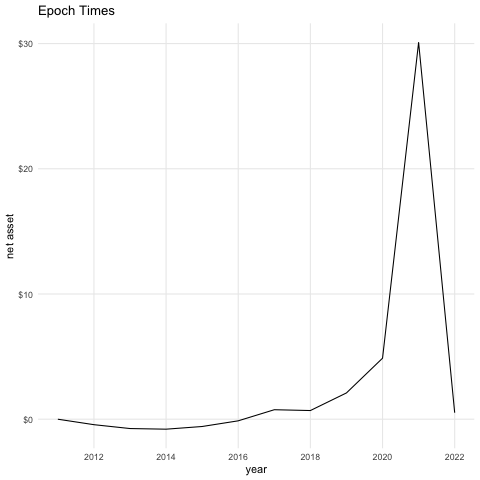

In [40]:
%%R

# line chart
ggplot(df) +
  aes(x = year, y = epochtimes, group=1)+
  geom_line() +
  labs(title = "Epoch Times", x = "year", y = "net asset") +
  # show year in integer
  scale_x_continuous(breaks = scales::pretty_breaks(n = 5)) +
  # relabel y-axis to millions of dollars "$1M"
  scale_y_continuous(labels = scales::dollar_format(scale = 1e-6)) +
  theme_minimal() +
  # remove grid
  theme(panel.grid.minor = element_blank())